# Zan Merrill (ahm2452)
HW 2

Academic disclaimer: I engaged with an LLM as a thought-partner for better understanding of topics and for code.  For short answer problems, the writing is my own, although I did double check some of my thoughts and wording with the LLM.  For the code, I relied on it more heavily, but still made the effort to understand & tweak everything it was doing. For example, after inspecting the data in question 5 and deciding on what kinds of pre-processing I wanted, I let the LLM write that code.  Then I would check and see if it had done what I wanted.  (Ultimately I did that several times to compare model outputs based on feature space).

In general, my effort is to get the LLM to teach me and help me understand concepts, not to just give me the answers.

# MIS 382N: Advanced Machine Learning Assignment 2

**Total points**: 80 pts

**Due**: 11:59 PM CST, Monday, September 29th, 2025.

**Submission**:
1. Submit your **Jupyter Notebook via Canvas**, AND
2. **Save your Jupyter Notebook to a PDF, and submit the PDF via Gradescope**.

You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas and Gradescope. But be sure to include the name and UT EID for both students.

Homework groups will be created and managed through Canvas and Gradescope, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

For questions involving mathematical derivations, you can write your answer on paper and then upload an image or directly write in markdown in the notebook. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Name(s) and EID(s)**:

-------------------------

Bookmarks:

Q1. <a href="#Q1">Stochastic Gradient Descent</a>  
Q2. <a href="#Q2">Bias and Variance</a>  
Q3. <a href="#Q3">Gradient Descent Learning Rate</a>  
Q4. <a href="#Q4">Stochastic Gradient Descent</a>  
Q5. <a href="#Q5">Rideshare Price Prediction: Ridge Regression & MLP</a>

-------------------------

# **Q1. Stochastic Gradient Descent (10 pts)** <a name="Q1" />

## **Part 1**. (5 pts)

Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.

### **Answer**:  
Assume for the sake of answering the question we're doing mini-batch SGD, so that each step towards a local minima (or update to model weights) occurs after a mini-batch.  If the error surface is complex, depending on the learning rate, these steps may be too large or erratic in directions that are not necessarily headed towards the minimum.  In other words, at that particular point on the error surface, the step may be in a direction that has a large dicrectional component actually away from the minimum.

That's where momentum comes in.  Using momentum, a moving average of gradients is kept at each step in the process.  Then, instead of updating weights using the gradient at a given point, the "effective" gradient of the moving average is used.  This dampens the effect of large or erratic directional components away from the minimum, and allows the process to keep moving more quickly towards convergance.  

## **Part 2**. (5 pts)

Read this [article](https://www.lunartech.ai/blog/gradient-descent-vs-mini-batch-gradient-descent-vs-stochastic-gradient-descent-an-expert-comparison) and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent (w.r.t Gradient Descent or pure Stochastic Gradient Descent?).

### **Answer**:
There are essentially four factors to consider when comparing methods: Data Usage, Update Frequency, Computational Efficiency, and Convergence Patterns.

Gradient Descent offers a stable but non-scalable model update method, while Stochastic Gradient Descent offers scalability, but introduces susceptability to "noisy" gradient estimates during the weight update process what create instability.

Mini-batch Gradient Descent attempts to offer the best of both worlds.  Although there is still some hyperparameter tuning to do and a decision to make on the batch size, it remains scalable for large data sets, and offers a reduction in gradient variance with respect to SGD.  Additionally, modern GPUs are designed to parallelize processes, and these batches can be run in parallel.

So back to the four factors:
- Large data sets can be processed in parallel batches, reducing gradient variance while maintaining computational efficiency.
- Update frequency is after a batch, so it's a middle ground between GD (whole dataset) and SGD (essentially batch size 1).
- Computational efficiency makes mini-batch gradient descent scalable and suitable for large datasets while having better stability than SGD.
- Convergence Patterns are smoother than those of SGD, but still has some stochastic exploration that aids in escaping local minima.


# **Q2. Bias and Variance (15 pts)** <a name="Q2" />

## **Part 1**. (6 pts)

Describe how increasing the amount of training data affects the bias and the variance components of a model's prediction error. In your answer, explain why these two components respond differently to larger datasets and discuss how this relationship influences overall generalization performance.

### **Answer**:  
The prediction error of every model can be broken down into a combination of bias, variance, and true, irreducible noise:

Bias - Systematic error based on the model or modeling assumptions.  For example if you apply linear regression to a curve, you're applying a model that assumes linearity to something non-linear.  That would be bias.  Adding more data cannot help your straight line to fit a curve, and in general, adding data does not influence bias.  You change bias by changing the model.

Variance - Sensitivity to the set of data you have to set up or train a model.  If you add more data, then your variance tends to go down because the model error will be less sensitive to individual training data points and better able to predict on unseen data.    

Noise - This is the true, irreducible noise.  This does not change from adding more data, but the model may better be able to handle true randomness if it has more data.  

Generalization performance is how well a model performs on unseed data.  Assuming the model you've chosen has the correct implicit assumptions (low bias) and the amount of actual randomness in whatever you're modeling is not extreme (irreducible noise), adding data during the training portion will reduce variance, making the model less sensitive to training data and better able to predict on unseen data.  


## **Part 2**. (9 pts)

Suppose you plot training error and validation error as functions of the training-set size.

a. Describe the characteristic patterns you would expect to see if the model is overfitting.

b. How would these patterns change if the model is underfitting?

c. Explain how you would use these observations to decide whether collecting more data, adjusting model complexity, or regularizing the model is the most appropriate next step.

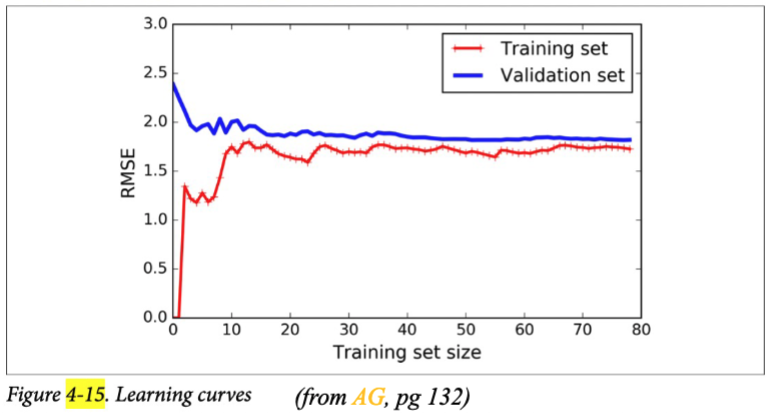

### **Answer**:
a.  The graph above is a good way to visualize overfitting.  If your training set is too small, RMSE for training is low, but for validation it stays high.  Eventually these two numbers will begin to converge, but the "overfit" gap between them may persist.

b.  If a model is underfitting, changing the training set size may not actually have much effect.  The reason for this is that underfit is defined more in terms of complexity:  If the model is underfitting, it is not complex enough to even recognize patterns during training.  Both training and validation RMSE will be high regardless of training set size.  

c.  If I'm underfitting, I would likely see high training RMSE regardless of training set size.  At that point, I would probably need to adjust model complexity to try and recognize more patterns in the data.  If I'm overfitting to training data, would be useful to collect more data if it's available or implement some kind of regularization to pull expected values of the model back toward a prior distribution (and therefore avoid overfitting to training data).

# **Q3. Gradient Descent Learning Rate (10 pts)** <a name='Q3' />

In the context of (stochastic) gradient descent, explain the role of the learning rate and its impact on optimization.

## **Part 1**. (5 pts)

What happens when the learning rate is set too high versus too low, and how does this affect convergence?

### **Answer**:
In the context of (stochastic) gradient descent, the role of the learning rate is to determind how large of a "step" to take at every weight update point along the error surface; during the optimization process, weights are updated in an effort to reduce model error.  The learning rate is a factor that determins how large that update is.  

If it is set too high, it could cause instability or lack of convergence toward a local minimum.  The reason is that at every point where model weights are updated, it could take too large a step in the direction of the gradient.  
If the gradient is actually towards the minimum but the step size is too large it will overshoot.  If, during stochastic gradient descent (which has some issues with stability), there is a gradient at a given point not in the direction of the local minimum and the step size is large, the model will off track itself away from a local minima.  

In either case, it could take much longer to converge or not converge at all.

If it's set too low, it may be computationally expensive to reach convergence, and you risk getting "stuck" in a "shallow valley" that is sub-optimal.   

## **Part 2**. (5 pts)

Why might one use a learning rate schedule or an adaptive learning rate method, and what are some common strategies?

### **Answer**:
A learning rate schedule is a predefined plan for how the learning rate will change over the course of training.  The idea is that if it is initially set high, the optimization process has an opportunity to "explore" the error surface and potentially find or make rapid progress towards the best minimum.  Then it is lowered at a manually adjusted point to allow for refinement.

Some common strategies for rate schedules are (had to ask chatGPT for this one):
- Step decay
- Exponential decay
- Polynomial decay
- cosine annealing
- cyclical leraning rates (cycle up and down)

With adaptive learning rate methods, essentially each parameter has its own step size included in the math.  Those step sizes change automatically during training depending on how the gradients change.  If one parameter gets big gradients, it's learning rate is tuned down.  If another gets small gradients, it's learning rate is tuned up.  

Some common adaptive strategies are (from lunartech.ai article referenced above):
- AdaGrad (adaptive gradient): Keeps a running total of the squares of past gradients.  The more updates a parameter has seen, the smallef its future learning rate becomes.
- RMSProp (root mean square propagation).  Uses an exponentially decayign average of squared gradients instead of an ever-growing sum.  Keeps learning rates "alive" during training and does not allow to shrink too much
- Adam (adaptive moment estimation.  Combines momentum (average of past gradients) with RMSProp (adaptive scaling).  Each parameter gets it's own learning rate AND stability benefits of momentum.

# **Q4. Stochastic Gradient Descent (15 pts)**<a name='Q4' />

## **Part 1**. (5 pts)

Suppose we have a model with a 2-dimensional input $[x_1, x_2]^\top$ and a 1-dimensional output $f(x)$:

$$ f(x) = w_0 + w_1e^{x_1} + w_2 \cos x_2 + w_3x_1^2x_2 $$

Derive the stochastic gradient descent (SGD) updates of the 4 coefficients $w_0, w_1, w_2, w_3$ for the mean squared error loss: $L = \frac{1}{2}(f(x) - y)^2$ where $y$ is the target.

Write the SGD updates based on a single data point $([x_1, x_2]^\top, y)$ in the following form:

\begin{equation}
w_0 ← w_0 - \eta \frac{\partial L}{\partial w_0}
\end{equation}

\begin{equation}
w_1 ← w_1 - \eta \frac{\partial L}{\partial w_1}
\end{equation}

\begin{equation}
w_2 \leftarrow w_2 - \eta \frac{\partial L}{\partial w_2}
\end{equation}

\begin{equation}
w_3 \leftarrow w_3 - \eta \frac{\partial L}{\partial w_3}
\end{equation}

$\eta$ is the learning rate and the partial derivatives (gradients) are for you to fill in.


### **Answer**:
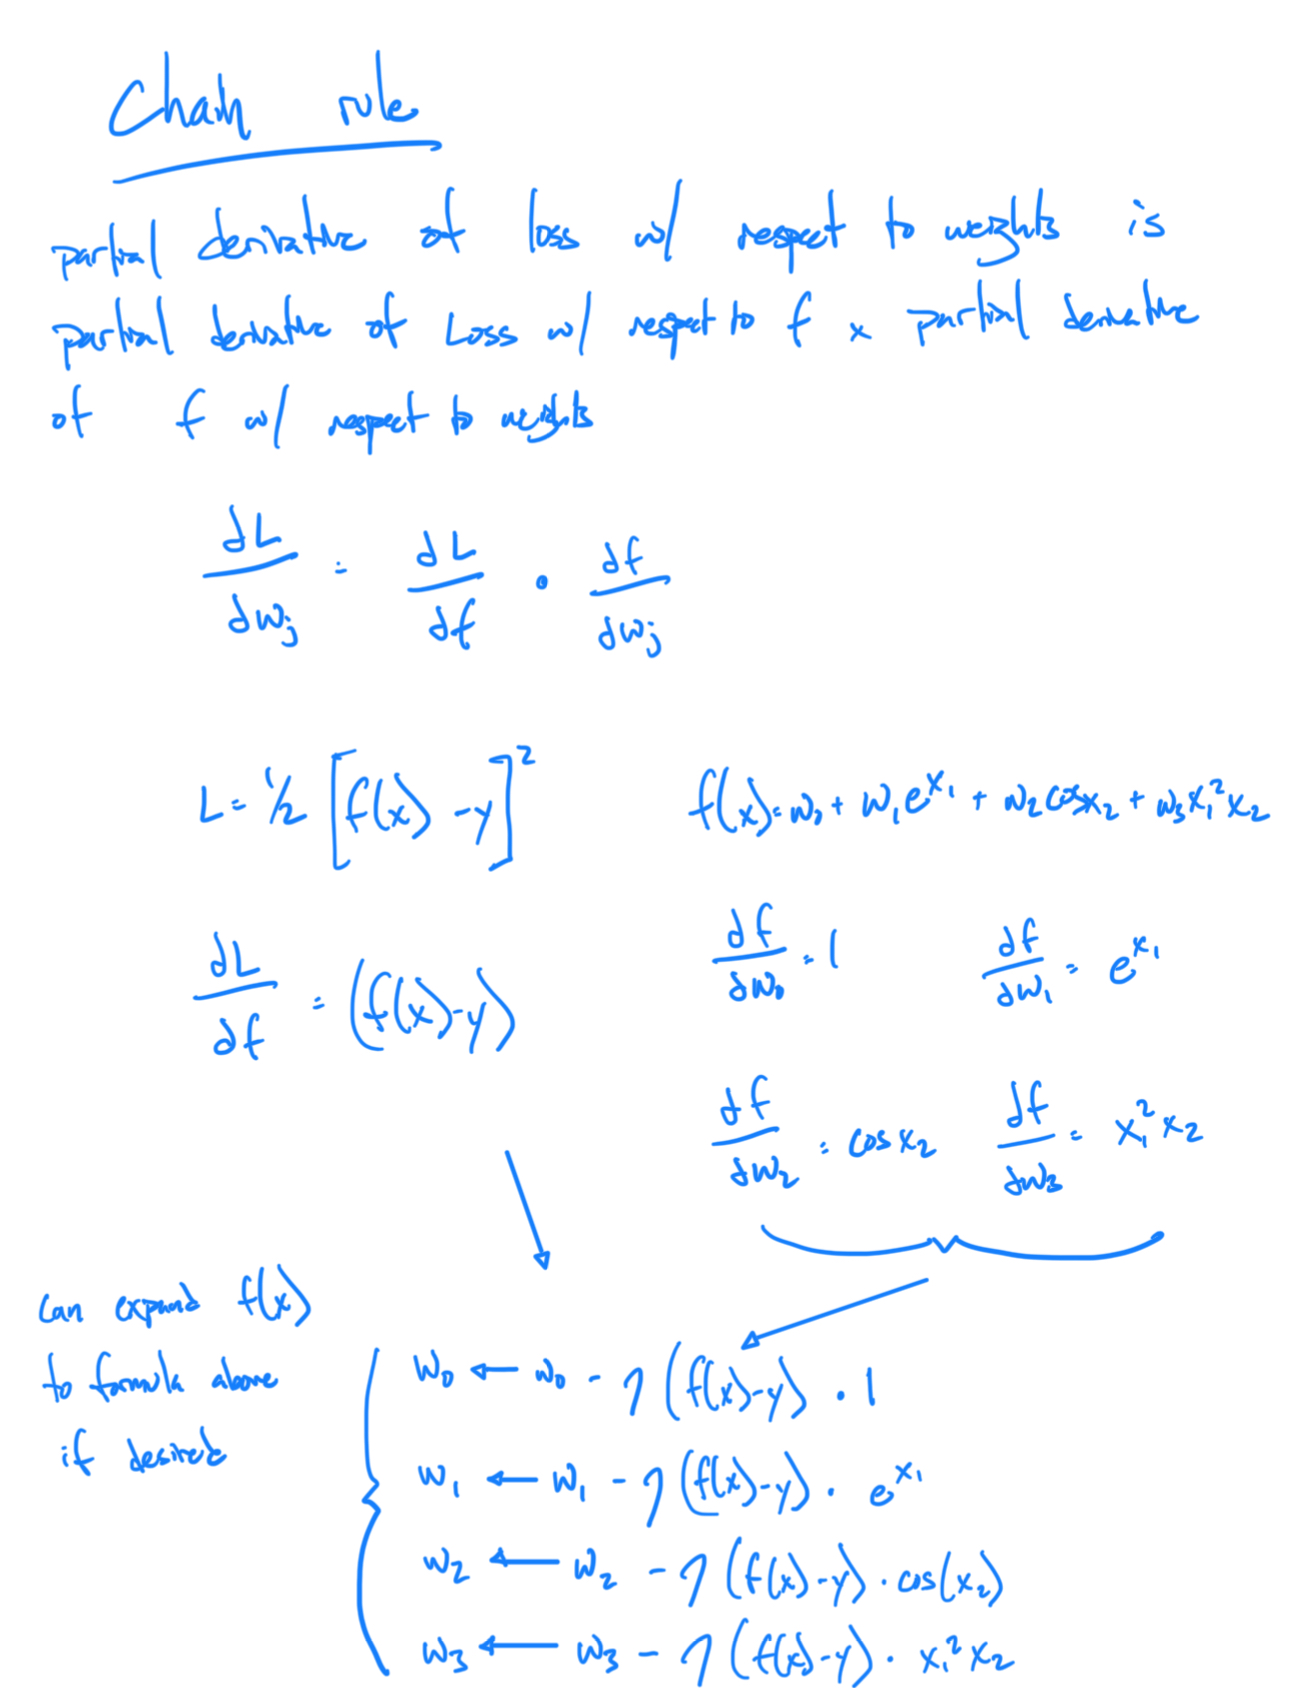

## **Part 2**. (10 pts)

Code an SGD solution for the model in Part 1. The loss function is mean squared error **with L2 regularization**.

(a) (5 pts) Complete the functions ```get_features``` and ```fit``` in the Regression class template provided below. ```get_features``` transforms 2D inputs to 4D features. ```fit``` learns the coefficients on the provided dataset and optionally plots the learning curves.


In [11]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import random
random.seed(42)
np.random.seed(42)


In [23]:
class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)

    def fit(self, X, y, plot=False):
        """
        Learn the coefficients on the dataset (X, y).
        Args:
            X: a 2D numpy array containint the input data, shape (n_samples, 2)
            y: a 1D numpy array containing the labels of the input data, shape (n_samples,)
            plot: a boolean indicating whether to plot the MSE and coefficients over epochs (default: False)
        Returns:
            None
        """
        # Do feature transformation
        X = self.get_features(X)
        mse = []
        coefs = []
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Get the i'th data point
                X_i = X[i,:]
                y_i = y[i]

                # Predict and compute gradients
                ### START CODE ###
                y_hat = float(self.coef @ X_i)
                error = y_hat - y_i

                gradient = error * X_i
                regularization_vector = np.r_[0.0, self.coef[1:]] 
                
                # don't regularize w0 b/c it's just an intercept
                gradient += 2.0 * self.regularization * regularization_vector
                ### END CODE ###

                # Update weights
                ### START CODE ###
                self.coef -= self.learning_rate * gradient
                ### END CODE ###
            coefs.append(self.coef.copy())
            residuals = y - self.linear_predict(X)
            mse.append(np.mean(residuals**2))

        self.mse_history = mse
        self.coef_history = np.array(coefs)
        self.final_mse = mse[-1]
        
        if plot == True:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))

            # Left: MSE
            ax1.plot(range(self.n_epoch), mse, marker='o')
            ax1.set_title(f"MSE (lr={self.learning_rate}, reg={self.regularization})")
            ax1.set_xlabel("epoch")
            ax1.set_ylabel("MSE")
    
            # Right: coefficients
            ax2.plot(range(self.n_epoch), self.coef_history[:,0], label="w0")
            ax2.plot(range(self.n_epoch), self.coef_history[:,1], label="w1")
            ax2.plot(range(self.n_epoch), self.coef_history[:,2], label="w2")
            ax2.plot(range(self.n_epoch), self.coef_history[:,3], label="w3")
            ax2.set_title("Coefficients over epochs")
            ax2.set_xlabel("epoch")
            ax2.set_ylabel("value")
            ax2.legend()
    
            fig.suptitle(f"Training progress (final MSE={self.final_mse:.4f})")
            fig.tight_layout()
            plt.show()

    def get_features(self, X):
        """
        Transform the 2-dimensional input into 4-dimensional features (the basis) for the linear model.
        """
        if X.ndim == 1:
            X = X.reshape(1, -1)
        n_samples = X.shape[0]
        X_new = np.zeros((n_samples, 4))

        ## START CODE ##
        x1 = X[:,0]
        x2 = X[:,1]
        X_new[:,0] = 1.0
        X_new[:,1] = np.exp(x1)
        X_new[:,2] = np.cos(x2)
        X_new[:,3] = (x1 ** 2) * x2
        ## END CODE ##

        return X_new

    def linear_predict(self, X):
        return X @ self.coef

(b) (5 pts) Use your Regression implementation in Part 2a to train on 'SGD_samples.csv' for 15 epochs. Try combinations of learning rates: [0.0001, 0.001, 0.01, 0.1] and regularization coefficients: [0, 0.1, 1]. For the combination that leads to the lowest final MSE and the combination that leads to the highest final MSE, plot MSE and the model coefficients $w_1, w_2, w_3, w_4$ as a function of epochs (for 15 epochs).


In [ ]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook locally, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [13]:
SGD_samples_path = "https://raw.githubusercontent.com/AHMerrill/machine_learning_hw_2/main/SGD_samples.csv"

data = pd.read_csv(SGD_samples_path)
X = np.array([data['x1'].values, data['x2'].values]).T
y = np.array(data['y'].values)

In [18]:
n_epochs = 15
learning_rate_list = [0.0001, 0.001, 0.01, 0.1]
regularization_list = [0, 0.1, 1]
hparam_combinations = list(itertools.product(learning_rate_list, regularization_list))

final_mse_list = []
# Iterate through all hyper-parameter combinations and get their corresponding final MSEs

### START CODE ###
for lr, reg in hparam_combinations:
    model = Regression(lr, reg, n_epochs)
    model.fit(X, y, plot=False)                 # train for n_epochs
    final_mse_list.append(model.mse_history[-1]) 
### END CODE ###

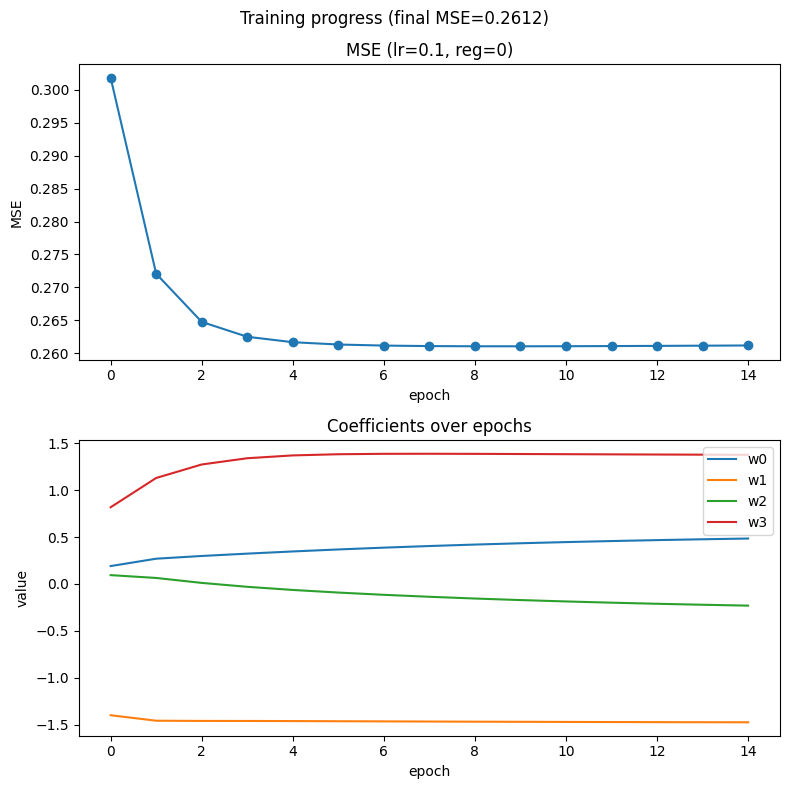

Hyper-parameter combination that lead to the lowest final MSE
Learning rate: 0.1 Regularization coefficient: 0


<Figure size 640x480 with 0 Axes>

In [24]:
# Get the hyper-parameters that lead to the lowest MSE and plot the MSE and model coefficients over epochs

### START CODE ###
# index of best combo
best_idx = int(np.argmin(final_mse_list))
lowest_mse_lr, lowest_mse_reg = hparam_combinations[best_idx]

# train a fresh model for the best combo and plot
best_model = Regression(lowest_mse_lr, lowest_mse_reg, n_epochs)
best_model.fit(X, y, plot=True)  # shows single figure with 2 subplots
plt.suptitle(f"BEST: lr={lowest_mse_lr}, reg={lowest_mse_reg}, final MSE={best_model.mse_history[-1]:.4f}", y=1.02)
### END CODE ###

print("Hyper-parameter combination that lead to the lowest final MSE")
print(f"Learning rate: {lowest_mse_lr} Regularization coefficient: {lowest_mse_reg}")

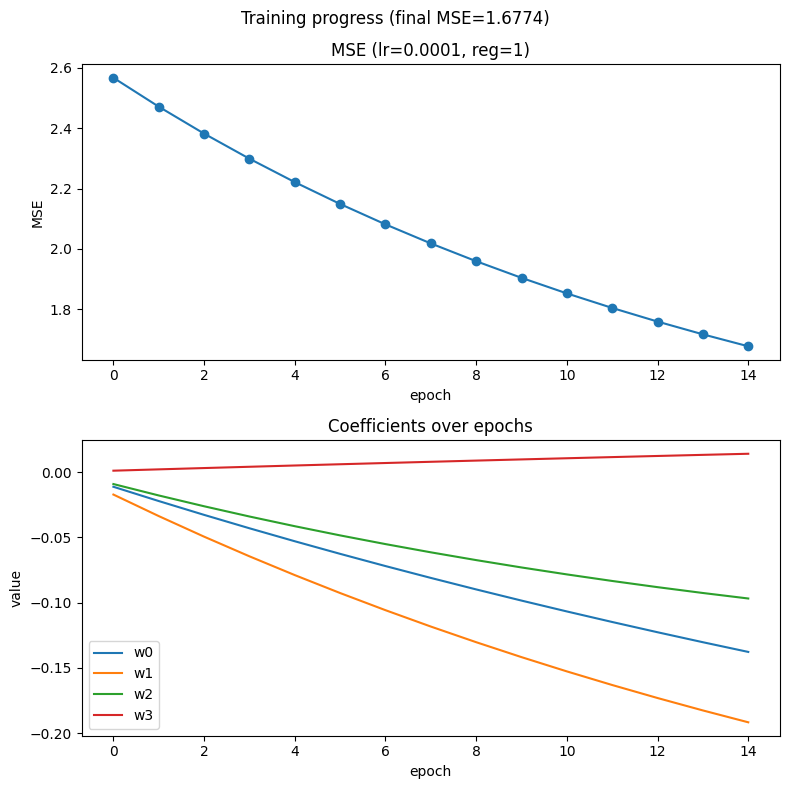

Hyper-parameter combination that lead to the highest final MSE
Learning rate: 0.0001 Regularization coefficient: 1


<Figure size 640x480 with 0 Axes>

In [25]:
# Get the hyper-parameters that lead to the highest MSE and plot the MSE and model coefficients over epochs

### START CODE ###
# index of worst combo
worst_idx = int(np.argmax(final_mse_list))
highest_mse_lr, highest_mse_reg = hparam_combinations[worst_idx]

# train a fresh model for the worst combo and plot
worst_model = Regression(highest_mse_lr, highest_mse_reg, n_epochs)
worst_model.fit(X, y, plot=True)
plt.suptitle(f"WORST: lr={highest_mse_lr}, reg={highest_mse_reg}, final MSE={worst_model.mse_history[-1]:.4f}", y=1.02)
### END CODE ###

print("Hyper-parameter combination that lead to the highest final MSE")
print(f"Learning rate: {highest_mse_lr} Regularization coefficient: {highest_mse_reg}")

# **Q5. Rideshare Price Prediction: Ridge Regression \& MLP (30 pts)** <a name='Q5' />


In this question, you will work on a rideshare dataset where the task is price prediction. The training set is ```rideshare_train.csv```, which contains trip records from 2018/11/26 to 2018/12/16. The test set is ```rideshare_test.csv```, which contains trip records from 2018/12/16 to 2018/12/18. The target column is ```price``` and the other columns can be used as inputs. You will decide how to preprocess your dataset and train your models. At the end of the notebook, there is a cell for you to evaluate your models. **NOTE: DON'T INCLUDE THE PRICE COLUMN TO THE INPUT OF YOUR MODEL, OTHERWISE YOU GET 0 POINTS**

**Part 1.** (10 pts)
Preprocess your dataset. This may include training/validation split, feature selection, and feature encoding \& scaling.

**Part 2.** (10 pts)
Train a [ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model for price prediction. The grading critera is:

1. Rationale behind selection of hyper-parameters such as regularization weight (2 pts)
2. Performance (8 pts):

$$
    \mbox{score} =
\begin{cases}
    0  & \mbox{Test R2 score} < 0.9\\
    4  & 0.9 \leq \mbox{Test R2 score} < 0.92 \\
    8 & \mbox{Test R2 score} > 0.92
\end{cases}
$$

**Part 3.** (10 pts)
Train a multi-layer perceptron (MLP) model for price prediction. The MLP can have one or two hidden layers. Comment on your (final) choice of model size and training method. Feel free to use any framework (sklearn, torch, etc.) to implement your MLP.

The grading critera is:

1. Rationale behind model size selection; selection of hyperparameter(s), etc. (2 pts)
2. Performance (8 pts):

$$
    \mbox{score} =
\begin{cases}
    0  & \mbox{Test R2 score} < 0.92\\
    4  & 0.92 \leq \mbox{Test R2 score} < 0.95 \\
    8 & \mbox{Test R2 score} > 0.95
\end{cases}
$$

In [74]:
# ========= Imports =========

# Stdlib typing (optional)
from typing import List, Optional, Dict, Tuple, Union

# Core
import numpy as np
import pandas as pd

# (Optional) Holidays feature engineering
# from pandas.tseries.holiday import USFederalHolidayCalendar

# scikit-learn: preprocessing & pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer
# (Optional) Text features
# from sklearn.feature_extraction.text import TfidfVectorizer

# scikit-learn: models, search, metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold  # add RandomizedSearchCV if you use it
from sklearn.metrics import (
    make_scorer,
    root_mean_squared_error,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
)

# Keras / SciKeras
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from tensorflow.keras import layers, regularizers


In [ ]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook locally, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [26]:
train_url = "https://raw.githubusercontent.com/AHMerrill/machine_learning_hw_2/main/rideshare_train.csv"
test_url  = "https://raw.githubusercontent.com/AHMerrill/machine_learning_hw_2/main/rideshare_test.csv"

train_df = pd.read_csv(train_url)
test_df  = pd.read_csv(test_url)

In [47]:
# train_df.info()

In [49]:
# train_df.head(5)

In [48]:
# train_df[['cab_type','product_id','name']]

## **Dataset Preprocessing**

Note: I did not do an additional test / training split. I wanted to maximize the amount of data I had for training, and it seemed unnecessary, given that the problem came with its own test set.  I did use cross validation, however, to tune hyper parameters.

I actually went through A LOT of trial and error with this.  I started with a very complex model that had maybe 130+ features.  Through a kind of manual process of comparing OOS RMSE, I widdled it down to a model that has 25 features primarily based on service (uber black, eg), distance, surge multiplier, and a little bit about the weather (is it hot, is it raining, etc.).

Ultimately the simpler model performed better than the more complex model for both Ridge and the MLP.

In [107]:
# ================================================
# Preprocessing
# ================================================

# ----- Locked roles -----
TARGET = "price"

# Features
CAT_COLS = ["service", "short_summary"]
NUM_COLS = ["distance", "surge_multiplier", "temperatureHigh", "temperatureLow"]
TEXT_COLS: list[str] = []  # none

# ---------- Feature engineering ----------
def engineer_df(df: pd.DataFrame) -> pd.DataFrame:
    X = df.copy()

    # Build service = cab_type|name if raw parts exist
    if "cab_type" in X.columns and "name" in X.columns:
        X["service"] = (
            X["cab_type"].astype(str).fillna("") + "|" +
            X["name"].astype(str).fillna("")
        ).str.strip("|")

    # Ensure required cols exist
    for c in NUM_COLS:
        if c not in X.columns: 
            X[c] = np.nan
    for c in CAT_COLS:
        if c not in X.columns: 
            X[c] = np.nan

    return X

def _make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", drop=None, sparse_output=True)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", drop=None, sparse=True)

def make_preprocessor():
    num_pipe = Pipeline([
        ("impute", SimpleImputer(strategy="mean")),
        ("scale",  StandardScaler(with_mean=False)),
    ])
    cat_pipe = Pipeline([
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("ohe",    _make_ohe()),
    ])
    ct = ColumnTransformer([
        ("num", num_pipe, NUM_COLS),
        ("cat", cat_pipe, CAT_COLS),
    ], sparse_threshold=0.3, remainder="drop", verbose_feature_names_out=False)

    return Pipeline([
        ("engineer",  FunctionTransformer(engineer_df, validate=False)),
        ("columnify", ct),
    ])

def get_feature_names(preprocessor: Pipeline) -> list[str]:
    ct = preprocessor.named_steps["columnify"]
    names = []
    for name, trans, cols in ct.transformers_:
        if name == "num":
            names.extend(list(cols))
    if "cat" in ct.named_transformers_:
        ohe = ct.named_transformers_["cat"].named_steps["ohe"]
        names.extend(ohe.get_feature_names_out(CAT_COLS).tolist())
    return names

# ---------- MINI-CHECK ----------
_check_df = train_df.copy()
preproc = make_preprocessor()
preproc.fit(_check_df.drop(columns=[TARGET]))
feat_names = get_feature_names(preproc)

print("Target column:", TARGET)
print("Feature count:", len(feat_names))
print("First 25 features:", feat_names[:25])


Target column: price
Feature count: 25
First 25 features: ['distance', 'surge_multiplier', 'temperatureHigh', 'temperatureLow', 'service_Lyft|Lux', 'service_Lyft|Lux Black', 'service_Lyft|Lux Black XL', 'service_Lyft|Lyft', 'service_Lyft|Lyft XL', 'service_Lyft|Shared', 'service_Uber|Black', 'service_Uber|Black SUV', 'service_Uber|UberPool', 'service_Uber|UberX', 'service_Uber|UberXL', 'service_Uber|WAV', 'short_summary_ Clear ', 'short_summary_ Drizzle ', 'short_summary_ Foggy ', 'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ', 'short_summary_ Rain ']


## **Train Ridge Regression Model**

For the Ridge model, I used cross validation to choose the regularization factor, then re-trained on the full training set with that regularization factor.  Therefore cross-validation is the rationale for why the model ended up the way it did.  

In [111]:
# ================================================
# Ridge CV (with service, short_summary, distance, surge_multiplier, temperatureHigh, temperatureLow)
# ================================================

# --- 0) Prepare X/y ---
_df_for_cv = train_df.copy()
y = _df_for_cv[TARGET].values
X = _df_for_cv.drop(columns=[TARGET])

# --- 1) Preprocessor (from preprocessing cell) ---
pp_cv = make_preprocessor()

# --- 2) Ridge wrapped with log/exp on target ---
ttr = TransformedTargetRegressor(
    regressor=Ridge(random_state=42),
    func=np.log1p,
    inverse_func=np.expm1
)

# --- 3) Pipeline ---
pipe = Pipeline([
    ("prep", pp_cv),
    ("model", ttr),
])

# --- 4) CV over alpha grid ---
alpha_grid = np.logspace(-3, 3, 25)   # 0.001 ... 1000
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
param_grid = {"model__regressor__alpha": alpha_grid}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0
)

# --- 5) Fit ---
grid.fit(X, y)

best_alpha = grid.best_params_["model__regressor__alpha"]
best_cv_rmse = -grid.best_score_
print(f"Best alpha (λ): {best_alpha}")
print(f"CV RMSE (mean over folds, $): {best_cv_rmse:,.3f}")

# --- 6) In-sample RMSE ---
best_pipe = grid.best_estimator_
y_pred_in_sample = best_pipe.predict(X)
train_rmse = root_mean_squared_error(y, y_pred_in_sample)
print(f"In-sample RMSE on training (regularized, $): {train_rmse:,.3f}")

# --- 7) Alpha curve ---
cvres = pd.DataFrame(grid.cv_results_)
cvres = cvres[["param_model__regressor__alpha","mean_test_score","std_test_score"]]
cvres = cvres.rename(columns={"param_model__regressor__alpha":"alpha"})
cvres["rmse"] = -cvres["mean_test_score"]
cvres = cvres.sort_values("alpha").reset_index(drop=True)
print("\nAlpha vs CV RMSE (first rows):")
print(cvres.head(12).to_string(index=False))

# --- 8) Feature importances ---
prep_fitted = best_pipe.named_steps["prep"]
feat_names = get_feature_names(prep_fitted)

ttr_fitted = best_pipe.named_steps["model"]
ridge_fitted = ttr_fitted.regressor_
coefs = ridge_fitted.coef_.ravel()

coef_df = pd.DataFrame({"feature": feat_names, "coef": coefs, "abs_coef": np.abs(coefs)})
coef_df = coef_df.sort_values("abs_coef", ascending=False)

top_k = 10
print(f"\nTop +{top_k} features by positive weight:")
print(coef_df.sort_values("coef", ascending=False).head(top_k)[["feature","coef"]].to_string(index=False))

print(f"\nTop -{top_k} features by negative weight:")
print(coef_df.sort_values("coef", ascending=True).head(top_k)[["feature","coef"]].to_string(index=False))

print(f"\nTotal features used: {len(feat_names)}")

# --- 9) Temperature coefficients (pulled out) ---
temp_coefs = coef_df[coef_df["feature"].isin(["temperatureHigh", "temperatureLow"])]
print("\nTemperature-related coefficients:")
print(temp_coefs.to_string(index=False))


Best alpha (λ): 31.622776601683793
CV RMSE (mean over folds, $): 2.151
In-sample RMSE on training (regularized, $): 2.150

Alpha vs CV RMSE (first rows):
    alpha  mean_test_score  std_test_score     rmse
    0.001        -2.154906        0.042243 2.154906
 0.001778        -2.154906        0.042243 2.154906
 0.003162        -2.154904        0.042243 2.154904
 0.005623        -2.154904        0.042242 2.154904
     0.01        -2.154904        0.042243 2.154904
 0.017783        -2.154902        0.042244 2.154902
 0.031623        -2.154900        0.042246 2.154900
 0.056234        -2.154892        0.042245 2.154892
      0.1        -2.154883        0.042249 2.154883
 0.177828        -2.154863        0.042252 2.154863
 0.316228        -2.154829        0.042257 2.154829
 0.562341        -2.154767        0.042265 2.154767

Top +10 features by positive weight:
                         feature     coef
       service_Lyft|Lux Black XL 0.736046
          service_Uber|Black SUV 0.704228
      

## **Train Multi-Layer Perceptron Model**

For the Multi-Layer Perceptron Model, I also used the entire training set to set this up.  I initially was going to cross validate for alpha, number of hidden layers, activation functions, batch sizes, learning rates, etc., but doing all that makes the code take forever to run.  

I decided to narrow that down to a grid search and CV for only the regularization term in the loss function (alpha).    

Why I chose what I did:
- 100 Epochs: I wanted to give the model enough run-throughs to finely tune, but there is also early stopping allowed.
- Batch size 64: nice balance between smaller and alrger batches
- 1e-3 learning rate is the Adam default
- ReLU in hidden layers:  fast, but simple and helps avoid vanishing gradients
- Linear output activation.  
- 2 hidden layers: captures more interactions than one
- 64 neurons per hidden layer - good capacity without being huge.  There are only 25 features in the model, so seemed like more than enough (even if not a 1:1 relationship).
- Grid search for regularization.  One more regularized version, and one less - effort to control for over and under fit and compare between the two


In [125]:
# ================================================
# MLP Grid Search (Adam + ReLU + Sigmoid)
# 5-fold CV; grid over: alpha, n_hidden_layers, hidden_units
# Fixed: epochs=100, batch_size=64
# ================================================

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
keras.utils.set_random_seed(RANDOM_SEED)

# ----- Fixed training knobs -----
EPOCHS = 100
BATCH_SIZE = 64
LEARNING_RATE = 1e-3        # Adam LR
ACTIVATION_HIDDEN = "relu"
ACTIVATION_OUTPUT = "linear"  # y will be scaled to [0,1] by TTR

# ----- Build function (Adam + ReLU hidden + Sigmoid output) -----
def build_mlp(meta, n_hidden_layers=2, hidden_units=64, alpha=1e-4):
    model = keras.Sequential()
    model.add(layers.Input(shape=(meta["n_features_in_"],)))

    for _ in range(int(n_hidden_layers)):
        model.add(layers.Dense(
            int(hidden_units),
            activation=ACTIVATION_HIDDEN,
            kernel_regularizer=regularizers.l2(float(alpha))
        ))

    model.add(layers.Dense(1, activation=ACTIVATION_OUTPUT))

    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mse"])
    return model

# Early stopping
ES = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# ----- Data -----
_df_for_cv = train_df.copy()
y = _df_for_cv[TARGET].values
X = _df_for_cv.drop(columns=[TARGET])

# ----- Preprocessor (from your cell) -----
pp = make_preprocessor()

# ----- SciKeras wrapper + target scaler (for sigmoid output) -----
keras_reg = KerasRegressor(
    model=build_mlp,
    verbose=0,
    callbacks=[ES],
    fit__epochs=EPOCHS,
    fit__batch_size=BATCH_SIZE,
    fit__validation_split=0.1,
)

ttr = TransformedTargetRegressor(
    regressor=keras_reg,
    transformer=MinMaxScaler(feature_range=(0, 1))
)

mlp_pipe = Pipeline([
    ("prep", pp),
    ("model", ttr),
])

# ----- Grid (ONLY alpha, layers, units) -----
# I was going to do a grid search over these parameters,
# but it was taking forever 
# so I just tried it with a few and it worked out...
ALPHA_GRID = [1e-3, 1e-4]
LAYERS_GRID = [2]
UNITS_GRID  = [64]

param_grid = {
    # build() params -> inside TTR -> regressor -> model:
    "model__regressor__model__alpha":           ALPHA_GRID,
    "model__regressor__model__n_hidden_layers": LAYERS_GRID,
    "model__regressor__model__hidden_units":    UNITS_GRID,
}

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

grid = GridSearchCV(
    estimator=mlp_pipe,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=cv,
    n_jobs=1,     # keep 1 for TF stability
    refit=True,
    verbose=1
)

grid.fit(X, y)

best_params = grid.best_params_
best_cv_rmse = -grid.best_score_
print("\n=== MLP Best Params (Adam, ReLU, Linear, 100e, bs=64) ===")
for k, v in best_params.items():
    print(f"{k}: {v}")
print(f"CV RMSE (mean over 5 folds, $): {best_cv_rmse:,.4f}")

best_mlp_pipe = grid.best_estimator_

# ----- In-sample performance -----
y_pred_in = best_mlp_pipe.predict(X)
train_rmse = root_mean_squared_error(y, y_pred_in)
print(f"In-sample RMSE (MLP): {train_rmse:,.4f}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits

=== MLP Best Params (Adam, ReLU, Linear, 100e, bs=64) ===
model__regressor__model__alpha: 0.0001
model__regressor__model__hidden_units: 64
model__regressor__model__n_hidden_layers: 2
CV RMSE (mean over 5 folds, $): 1.9903
In-sample RMSE (MLP): 1.9359


## **Predict and Evaluate on Test Set**

In [ ]:
# Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook locally, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [126]:
# ================================================
# Unified Test-set Evaluation: Ridge + MLP
# ================================================
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- File mapping (same URLs) ---
train_url = "https://raw.githubusercontent.com/AHMerrill/machine_learning_hw_2/main/rideshare_train.csv"
test_url  = "https://raw.githubusercontent.com/AHMerrill/machine_learning_hw_2/main/rideshare_test.csv"

# Load once if not present
if "train_df" not in globals():
    train_df = pd.read_csv(train_url)
if "test_df" not in globals():
    test_df  = pd.read_csv(test_url)

y_test = test_df[TARGET].values
X_test = test_df.drop(columns=[TARGET], errors="ignore")

def _evaluate(y_pred, y_true):
    y_pred = np.asarray(y_pred).reshape(-1)
    y_true = np.asarray(y_true).reshape(-1)
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2":  r2_score(y_true, y_pred),
    }

results = []

# --- Ridge ---
if "best_pipe" in globals():
    y_test_ridge_pred = best_pipe.predict(X_test)
    ridge_metrics = _evaluate(y_test_ridge_pred, y_test)
    print("Ridge Regression Test Set Evaluation:")
    print("=" * 50)
    print(f"MSE:   {ridge_metrics['MSE']:.4f}")
    print(f"MAE:   {ridge_metrics['MAE']:.4f}")
    print(f"R²:    {ridge_metrics['R2']:.4f}\n")
    ridge_metrics["Model"] = "Ridge"
    results.append(ridge_metrics)
else:
    print("Note: best_pipe (Ridge) not found — skip Ridge evaluation.\n")

# --- MLP (only if trained) ---
if "best_mlp_pipe" in globals():
    y_test_mlp_pred = best_mlp_pipe.predict(X_test)
    mlp_metrics = _evaluate(y_test_mlp_pred, y_test)
    print("MLP Test Set Evaluation:")
    print("=" * 50)
    print(f"MSE:   {mlp_metrics['MSE']:.4f}")
    print(f"MAE:   {mlp_metrics['MAE']:.4f}")
    print(f"R²:    {mlp_metrics['R2']:.4f}\n")
    mlp_metrics["Model"] = "MLP (Adam/ReLU/Linear)"
    results.append(mlp_metrics)
else:
    print("Note: best_mlp_pipe not found — train the MLP grid first to evaluate it.\n")

# --- Side-by-side summary ---
if results:
    summary = pd.DataFrame(results)[["Model", "MSE", "MAE", "R2"]].sort_values("MSE")
    print("Summary comparison (lower MSE/MAE better, higher R² better):")
    print(summary.to_string(index=False))


Ridge Regression Test Set Evaluation:
MSE:   4.7306
MAE:   1.4536
R²:    0.9454

MLP Test Set Evaluation:
MSE:   3.7701
MAE:   1.3644
R²:    0.9565

Summary comparison (lower MSE/MAE better, higher R² better):
                 Model      MSE     MAE       R2
MLP (Adam/ReLU/Linear) 3.770131 1.36440 0.956450
                 Ridge 4.730593 1.45358 0.945356
